# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
#query = f"{url}appid={api_key}&q={city}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | taltal
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | aloleng
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | aswan
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bousso
Processing Record 20 of Set 1 | calbuco
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | ulaangom
Pr

City not found. Skipping...
Processing Record 36 of Set 4 | ponta delgada
Processing Record 37 of Set 4 | pecos
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | progreso
Processing Record 40 of Set 4 | tommot
Processing Record 41 of Set 4 | taunggyi
Processing Record 42 of Set 4 | placido de castro
Processing Record 43 of Set 4 | bolshaya irba
City not found. Skipping...
Processing Record 44 of Set 4 | gourdon
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | milisauti
Processing Record 48 of Set 4 | planeta rica
Processing Record 49 of Set 4 | broome
Processing Record 0 of Set 5 | price
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | seybaplaya
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | bairiki
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 

Processing Record 27 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 8 | zlocieniec
Processing Record 29 of Set 8 | zhovtneve
Processing Record 30 of Set 8 | mackenzie
Processing Record 31 of Set 8 | zeya
Processing Record 32 of Set 8 | xining
Processing Record 33 of Set 8 | nelson bay
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | lichuan
Processing Record 36 of Set 8 | vina del mar
Processing Record 37 of Set 8 | bara
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | novyy urengoy
Processing Record 40 of Set 8 | vanavara
Processing Record 41 of Set 8 | alamos
Processing Record 42 of Set 8 | coquimbo
Processing Record 43 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 44 of Set 8 | lakes entrance
Processing Record 45 of Set 8 | paamiut
Processing Record 46 of Set 8 | narsaq
Processing Record 47 of Set 8 | aitape
Processing Record 48 of Set 8 | talnakh
Processing Record 49 of Set 8 | hambantota
Processing

Processing Record 17 of Set 12 | catalina
Processing Record 18 of Set 12 | huadian
Processing Record 19 of Set 12 | chunian
Processing Record 20 of Set 12 | dafeng
Processing Record 21 of Set 12 | simpsonville
Processing Record 22 of Set 12 | biltine
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | bernalillo
Processing Record 25 of Set 12 | lamu
Processing Record 26 of Set 12 | visimo-utkinsk
City not found. Skipping...
Processing Record 27 of Set 12 | liwale
Processing Record 28 of Set 12 | shirokiy
Processing Record 29 of Set 12 | dharchula
Processing Record 30 of Set 12 | brenham
Processing Record 31 of Set 12 | pasighat
Processing Record 32 of Set 12 | ozinki
Processing Record 33 of Set 12 | sao felix do xingu
Processing Record 34 of Set 12 | ducheng
Processing Record 35 of Set 12 | mount hagen
Processing Record 36 of Set 12 | riberalta
Processing Record 37 of Set 12 | tidore
City not found. Skipping...
Processing Record 38 of Set 12 | ihosy
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-6.31,94,100,8.86,RU,1669900630
1,tuktoyaktuk,69.4541,-133.0374,-21.92,100,100,1.94,CA,1669900468
2,kapaa,22.0752,-159.3190,23.18,90,20,3.60,US,1669900630
3,port alfred,-33.5906,26.8910,21.77,82,26,2.68,ZA,1669900631
4,taltal,-25.4000,-70.4833,19.53,69,0,2.33,CL,1669900631


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-6.31,94,100,8.86,RU,1669900630
1,tuktoyaktuk,69.4541,-133.0374,-21.92,100,100,1.94,CA,1669900468
2,kapaa,22.0752,-159.3190,23.18,90,20,3.60,US,1669900630
3,port alfred,-33.5906,26.8910,21.77,82,26,2.68,ZA,1669900631
4,taltal,-25.4000,-70.4833,19.53,69,0,2.33,CL,1669900631


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

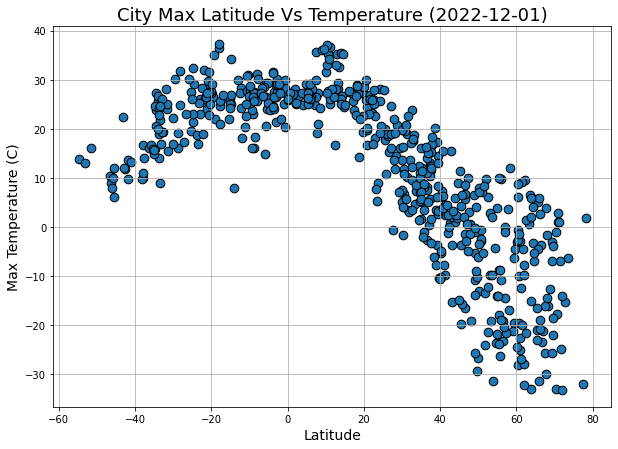

In [9]:
# Build scatter plot for latitude vs. temperature
ax1 = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, s=75, figsize=(10,7),
                       marker="o", edgecolor="black")

# Incorporate the other graph properties
title1 = f"City Max Latitude Vs Temperature ({date.today()})"
ax1.set_title(title1, fontdict={'fontsize':18})
ax1.set_xlabel("Latitude", fontdict={'fontsize':14})
ax1.set_ylabel("Max Temperature (C)", fontdict={'fontsize':14})

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

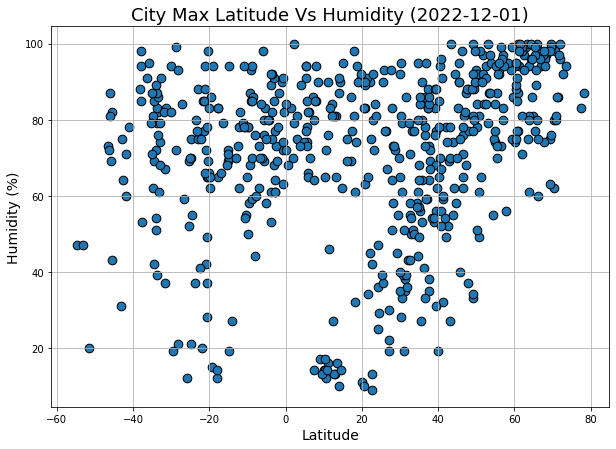

In [10]:
# Build the scatter plots for latitude vs. humidity
ax2 = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, s=75, figsize=(10,7),
                       marker="o", edgecolor="black")

# Incorporate the other graph properties
title2 = f"City Max Latitude Vs Humidity ({date.today()})"
ax2.set_title(title2, fontdict={'fontsize':18})
ax2.set_xlabel("Latitude", fontdict={'fontsize':14})
ax2.set_ylabel("Humidity (%)", fontdict={'fontsize':14})

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

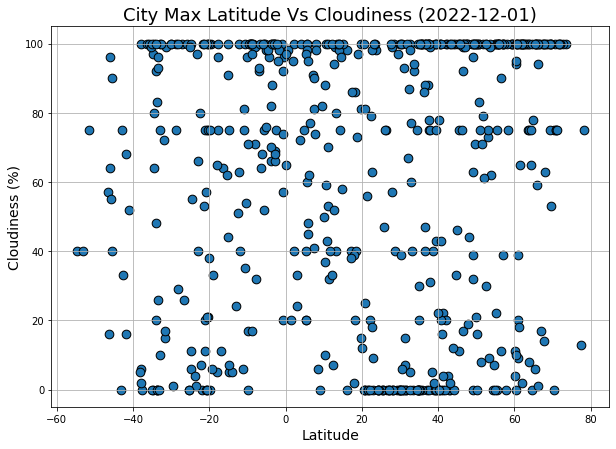

In [11]:
# Build the scatter plots for latitude vs. cloudiness
ax3 = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, s=75, figsize=(10,7),
                       marker="o", edgecolor="black")

# Incorporate the other graph properties
title3 = f"City Max Latitude Vs Cloudiness ({date.today()})"
ax3.set_title(title3, fontdict={'fontsize':18})
ax3.set_xlabel("Latitude", fontdict={'fontsize':14})
ax3.set_ylabel("Cloudiness (%)", fontdict={'fontsize':14})

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

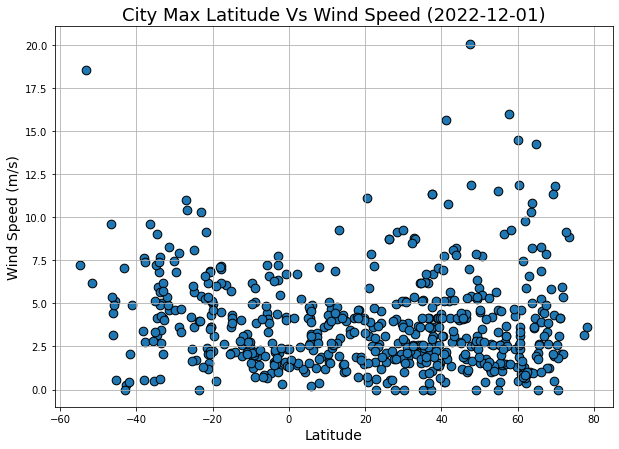

In [12]:
# Build the scatter plots for latitude vs. wind speed
ax4 = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, s=75, figsize=(10,7),
                       marker="o", edgecolor="black")

# Incorporate the other graph properties
title4 = f"City Max Latitude Vs Wind Speed ({date.today()})"
ax4.set_title(title4, fontdict={'fontsize':18})
ax4.set_xlabel("Latitude", fontdict={'fontsize':14})
ax4.set_ylabel("Wind Speed (m/s)", fontdict={'fontsize':14})

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def get_lin_regress(x_ax_vlus, y_ax_vlus):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax_vlus, y_ax_vlus)
    regress_vlus = x_ax_vlus * slope + intercept
    line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_vlu = rvalue
    
    return regress_vlus, line_eqn, r_vlu

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-6.31,94,100,8.86,RU,1669900630
1,tuktoyaktuk,69.4541,-133.0374,-21.92,100,100,1.94,CA,1669900468
2,kapaa,22.0752,-159.3190,23.18,90,20,3.60,US,1669900630
7,aloleng,16.1307,119.7824,27.47,75,98,3.46,PH,1669900631
8,longyearbyen,78.2186,15.6401,1.91,87,75,3.60,SJ,1669900615


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port alfred,-33.5906,26.8910,21.77,82,26,2.68,ZA,1669900631
4,taltal,-25.4000,-70.4833,19.53,69,0,2.33,CL,1669900631
5,bredasdorp,-34.5322,20.0403,27.28,42,80,9.01,ZA,1669900631
6,new norfolk,-42.7826,147.0587,11.72,64,33,0.27,AU,1669900538
10,arraial do cabo,-22.9661,-42.0278,25.98,88,40,10.29,BR,1669900632


In [18]:
print("Counts for Northern Hemisphere:") 
northern_hemi_df.count()

Counts for Northern Hemisphere:


City          398
Lat           398
Lng           398
Max Temp      398
Humidity      398
Cloudiness    398
Wind Speed    398
Country       398
Date          398
dtype: int64

In [19]:
print("Counts for Southern Hemisphere:")
southern_hemi_df.count()

Counts for Southern Hemisphere:


City          180
Lat           180
Lng           180
Max Temp      180
Humidity      180
Cloudiness    180
Wind Speed    180
Country       174
Date          180
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8362097385239442


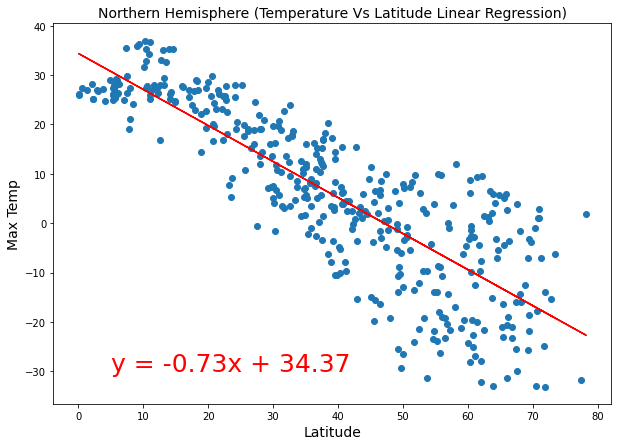

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(5,-30),fontsize=25,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.title("Northern Hemisphere (Temperature Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: 0.6127804955581354


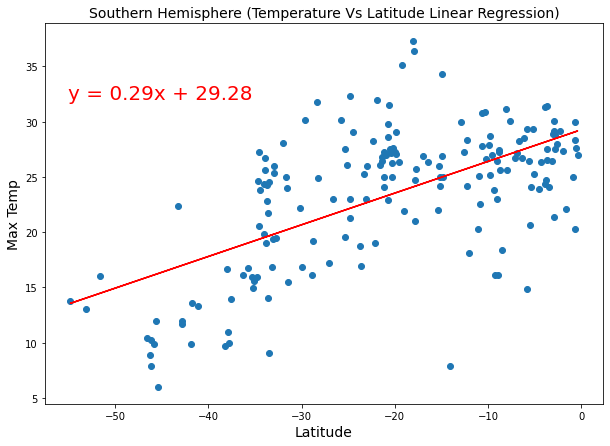

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-55,32),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.title("Southern Hemisphere (Temperature Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 
 - Northern hemisphere shows a high negative value (close to -1) indicating an inverse relationship between temperature
   and latitude. Closer the location to equator, higher is the temperature and low temperature farther away.
 - Southern hemisphere shows a moderate positive relation. Closer to equator, higher the temperature.
   But the cities mapped here are relatively higher as we go closer to equator.
 - Relation of temperature should be close for both hemispheres but count of cities is 398 for North Vs 180 for South
   With many outliers and difference in dataset, the huge variance seems justified. (Note: Count of successful data 
   retrieval when this observation was recorded)

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.39415361209383626


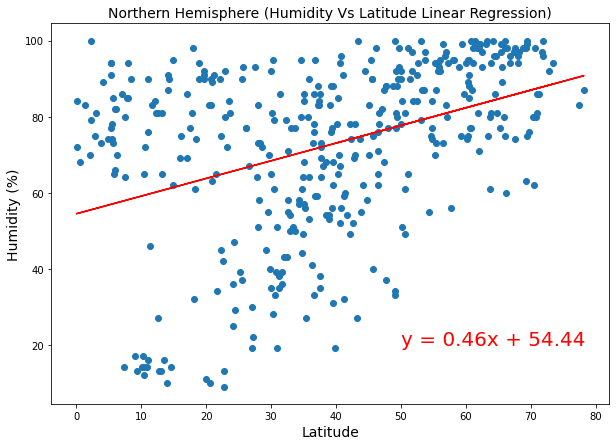

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(50,20),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title("Northern Hemisphere (Humidity Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: 0.1210838408222027


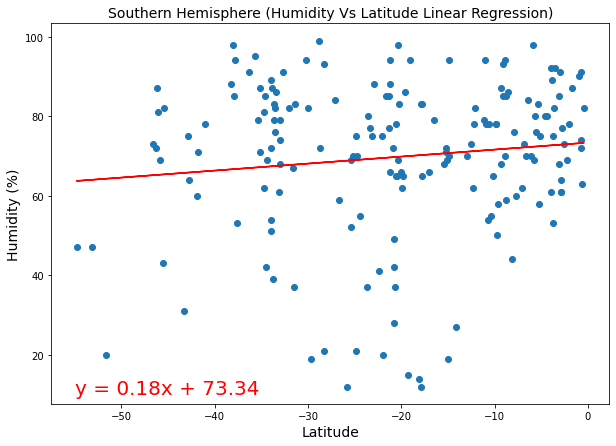

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-55,10),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title("Southern Hemisphere (Humidity Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 
 - Linear coefficient value of 0.39 and 0.12 indicate a very weak positive linear relationship between latitude and
   humidity.
 - Northern hemisphere having winter now while southern in summer, explains the slopes for each (although weak)
   south showing a little bit high humidity near equater (temperature high) compared to farther away.
   It is opposite for north at this time temperature low explains low humidity along with season.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.17488696690995353


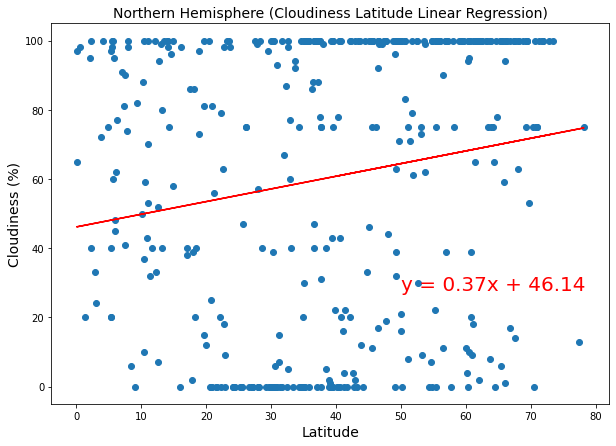

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(50,28),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title("Northern Hemisphere (Cloudiness Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: 0.2748635517077274


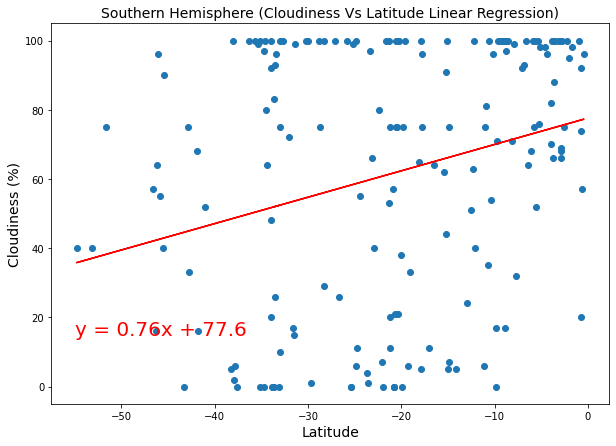

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-55,15),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title("Southern Hemisphere (Cloudiness Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 
 - Linear coefficient is very low and we can say that there is no linear relation between Latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.11588242581561255


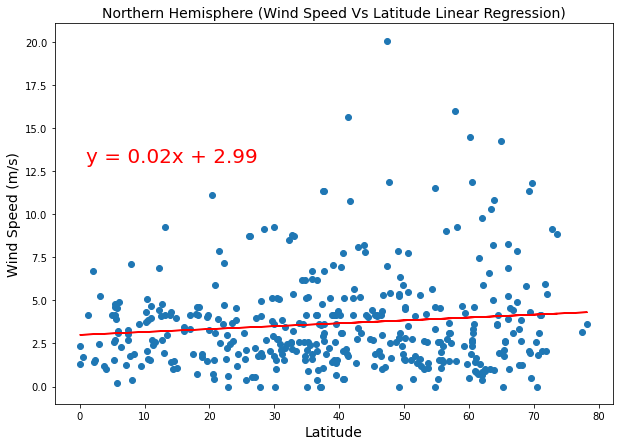

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(1,13),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.title("Northern Hemisphere (Wind Speed Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: -0.32058684096564427


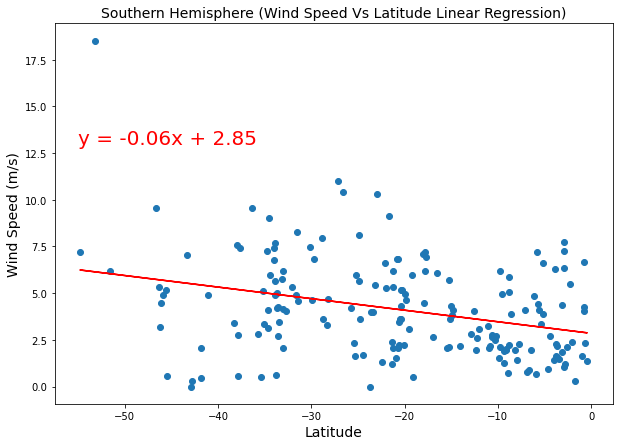

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-55,13),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.title("Southern Hemisphere (Wind Speed Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 
 - Northern hemisphere is showing a flat line and r value is almost a 0. No linear relationship between wind speed
   and latitude.
 - Southern hemisphere shows a negative and a very weak relaitonship.